In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("monoxor.csv")
df.head()

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,...,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
0,/crm/note,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
1,/crm/note,Clayton Cooper,As possible American many prepare four strong....,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
2,/crm/note,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False
3,/crm/note,Laura Fisher,State third represent energy campaign not forg...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
4,/crm/note,Tyler Santos,Us enjoy since. Time identify image position o...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,False


In [3]:
df.describe(include = "all")

,req/baseUrl,req/body/note/title,req/body/note/desc,req/fresh,req/headers/host,req/headers/user-agent,req/headers/content-type,req/headers/org_id,req/headers/user_session_id,req/headers/accept,...,req/hostname,req/ip,req/originalUrl,req/path,req/protocol,req/secure,req/stale,req/subdomains/0,req/xhr,isSafe
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1,994,750,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
top,/crm/note,Michael Smith,note title <title onPropertyChange title onPro...,False,example.com,insomnia/2020.4.2,application/json,5f572820f65af8ac955b2e83,5fb27d3750b11901a35649fe,*/*,...,example.com,::ffff:117.99.96.244,/crm/note,/note,http,False,True,crm,False,True
freq,1000,3,36,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,572
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#We only need Body Title, Body Description and isSafe features. Rest are not useful to us.

In [5]:
df_new = df[['req/body/note/title', 'req/body/note/desc', 'isSafe']]

df_new.head()

,req/body/note/title,req/body/note/desc,isSafe
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,True
1,Clayton Cooper,As possible American many prepare four strong....,True
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False
3,Laura Fisher,State third represent energy campaign not forg...,True
4,Tyler Santos,Us enjoy since. Time identify image position o...,False


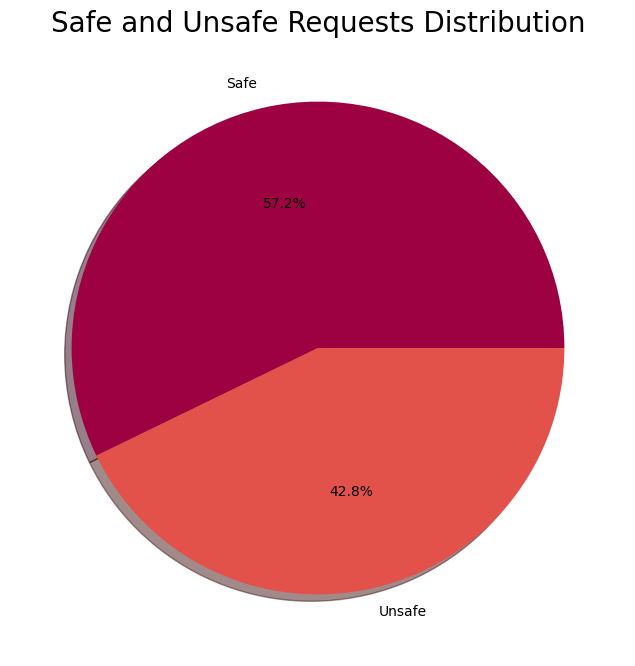

In [6]:
mylabels='Safe','Unsafe'
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.figure(figsize=(16,8))

plt.title("Safe and Unsafe Requests Distribution", size = 20)
plt.pie(df_new['isSafe'].value_counts(), labels=mylabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [7]:
#There are more safe requests.

In [8]:
not_safe = df_new['isSafe'].isin([False])
df_not_safe = df_new[not_safe].reset_index(drop=True)

df_not_safe

,req/body/note/title,req/body/note/desc,isSafe
0,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,False
1,Tyler Santos,Us enjoy since. Time identify image position o...,False
2,Tracy Smith,Area single occur chair opportunity art many. ...,False
3,Jacob Martin,note title <title onPropertyChange title onPro...,False
4,Colleen Riggs,"Meeting "")) or ((""x""))=((""x Notes 12:30",False
...,...,...,...
423,Gary Ruiz,"<img src=1 href=1 onerror=""javascript:alert(1)...",False
424,Jordan Brown,"Meeting "")) or ((""x""))=((""x Notes 12:30",False
425,Larry Perez,ext1%3Cvideo+src%3D1+href%3D1+onerror%3D%22jav...,False
426,Jason Tucker,ext1%3Cvideo+src%3D1+href%3D1+onerror%3D%22jav...,False


In [9]:
safe = df_new['isSafe'].isin([True])
df_safe = df_new[safe].reset_index(drop=True)

df_safe

,req/body/note/title,req/body/note/desc,isSafe
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,True
1,Clayton Cooper,As possible American many prepare four strong....,True
2,Laura Fisher,State third represent energy campaign not forg...,True
3,Kevin Gonzalez,Resource politics already close phone special ...,True
4,James Taylor,Truth care red give all own. Full better marke...,True
...,...,...,...
567,James Smith,Mr support color history natural PM. Informati...,True
568,Bridget Elliott,Recently crime before five thought bit. Card f...,True
569,Jasmine Gibson,Set nature they then low resource truth. Edge ...,True
570,Mr. Antonio Valdez DDS,Push case them such face suffer. Letter middle...,True


In [10]:
#There are 428 unsafe requests and 572 safe requests.

In [11]:
#Maliciuos Words in Safe and Unsafe requests.

In [12]:
def remove_punctuation(text):
    no_punct = [word for word in text if not word.isalpha()]
    no_punct = [word for word in no_punct if word!= '.']
    words_wo_punct = ''.join(no_punct)
   
    return words_wo_punct
mal_words_ns = df_not_safe['req/body/note/desc'].apply(lambda x: remove_punctuation(x))
print(mal_words_ns)

0                                     2  2  
1                          \r\n             
2                              \r\n         
3                          <   ="::(1)"></ >
4                     "))  ((""))=(("  12:30
                       ...                  
423                      < =1 =1 =":(1)"></>
424                   "))  ((""))=(("  12:30
425    1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3
426    1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3
427                      < =1 =1 =":(1)"></>
Name: req/body/note/desc, Length: 428, dtype: object


In [13]:
mal_words_ns.index = np.arange(len(mal_words_ns))

corpus_mal_words = []

for i in (range(len(mal_words_ns))):
  review = mal_words_ns[i]
  review = review.lower()
  review = review.split()
  
  if len(review) > 0:
      corpus_mal_words.append(review)
corpus_mal_words

[['2', '2'],
 ['<', '="::(1)"></', '>'],
 ['"))', '((""))=(("', '12:30'],
 ['--><!--', '-->>', '<', '=:', '=:(1)>', '-->'],
 ['1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3'],
 ['<', '=1', '=1', '=":(1)"></>'],
 ['"))', '((""))=(("', '12:30'],
 ['"))', '((""))=(("', '12:30'],
 ['<', '="::(1)"></', '>'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['<', '="::(1)"></', '>'],
 ['<\x13=', '=":(1)">'],
 ['"/*'],
 ['"/*'],
 ['<\x13=', '=":(1)">'],
 ['"))', '((""))=(("', '12:30'],
 ['1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['"))', '((""))=(("', '12:30'],
 ['<', '=1', '=1', '=":(1)"></>'],
 ['"))', '((""))=(("', '12:30'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['1<', '=1', '=1', '=":(1)"></>'],
 ['--><!--', '-->>', '<', '=:', '=:(1)>', '-->'],
 ['<\x13=', '=":(1)">'],
 ['1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3'],
 ['1%3+%31+%31+%3%22%3%281%29%22%3%3%2%3'],
 ['2', '2'],
 ['2', '2'],
 ['<', '="::(1)"></', '>'],
 ['<', '="::(1)"></', '>'],
 [

In [14]:
print(len(corpus_mal_words))

259


In [15]:
string.punctuation
def remove_punctuation(text):
    no_punct = [word for word in text if not word.isalpha()]
    no_punct = [word for word in no_punct if word!= '.']
    words_wo_punct = ''.join(no_punct)
   
    return words_wo_punct
mal_words_s = df_safe['req/body/note/desc'].apply(lambda x: remove_punctuation(x))
print(mal_words_s)

0              \r\n         \r\n         
1                                        
2                             \r\n       
3                                        
4                             \r\n       
                      ...                
567                                      
568                                      
569                          \r\n        
570                       \r\n           
571                                      
Name: req/body/note/desc, Length: 572, dtype: object


In [16]:
le = LabelEncoder()
df_new['isSafe'] = le.fit_transform(df_new['isSafe']) 

C:\Users\Malay\AppData\Local\Temp\ipykernel_46752\815172285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['isSafe'] = le.fit_transform(df_new['isSafe'])


In [17]:
df_new.head()

,req/body/note/title,req/body/note/desc,isSafe
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,1
1,Clayton Cooper,As possible American many prepare four strong....,1
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,0
3,Laura Fisher,State third represent energy campaign not forg...,1
4,Tyler Santos,Us enjoy since. Time identify image position o...,0


In [18]:
#Adding description length as a feature.

In [19]:
df_new['desc length'] = df_new['req/body/note/desc'].astype(str).apply(len)

C:\Users\Malay\AppData\Local\Temp\ipykernel_46752\1977689616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['desc length'] = df_new['req/body/note/desc'].astype(str).apply(len)


In [20]:
df_new.head()

,req/body/note/title,req/body/note/desc,isSafe,desc length
0,Tina Johnson,Top recognize eat. Fact whom spend area thing ...,1,182
1,Clayton Cooper,As possible American many prepare four strong....,1,155
2,Curtis Wolfe,Tuesday Notes or 2 like 2 XSP Class,0,35
3,Laura Fisher,State third represent energy campaign not forg...,1,183
4,Tyler Santos,Us enjoy since. Time identify image position o...,0,176


In [21]:
y = df_new['isSafe']
X = df_new.drop(columns = 'isSafe')

In [22]:
#Bag of words(BOW) Model

In [23]:
print("Shape of X: " , X.shape)
print("Shape of y: " , y.shape)

Shape of X:  (1000, 3)
Shape of y:  (1000,)


In [24]:
#Creating corpus after removing stopwords.

In [25]:
X.index = np.arange(len(X))
corpus_bow = []
from tqdm import tqdm
for i in tqdm(range(len(X))):
  review = X['req/body/note/desc'][i]
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus_bow.append(review)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1144.86it/s]


In [26]:
corpus_bow

['top recogn eat. fact spend area thing material. war recent also messag four billion. water deep. word amount tabl entire. drug sever amount live newspaper.',
 'possibl american mani prepar four strong. visit care organ everyon kitchen develop magazine. rang realiz direct wife capit move.',
 'tuesday note 2 like 2 xsp class',
 'state third repres energi campaign forget there. experi send heart suggest. studi paper common car kitchen it. time manag tree. real like agenc rule.',
 'us enjoy since. time identifi imag posit ok best. box throw yeah without. left explain author protect throw artist lot fly. thing year approach miss bank.',
 'area singl occur chair opportun art many. alon paper discuss may purpos though far. remain cours ready. sell growth memori look ask clear.',
 'resourc polit alreadi close phone special bit. million care yet mouth discuss stock total. entir import earli might.',
 'note titl <titl onpropertychang titl onpropertychange="javascript:javascript:alert(1)"></tit

In [27]:
cv  = CV(max_features = 100,ngram_range=(1,1))

X_cv = cv.fit_transform(corpus_bow).toarray()
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size = 0.20, random_state = 0)
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the classifier: ",acc*100,"%")
print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,y_pred))
print("Classification report: \n" ,metrics.classification_report(y_test,y_pred))

Accuracy of the classifier:  84.0 %
Confusion matrix is :
 [[ 49  32]
 [  0 119]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        81
           1       0.79      1.00      0.88       119

    accuracy                           0.84       200
   macro avg       0.89      0.80      0.82       200
weighted avg       0.87      0.84      0.83       200



In [28]:
#The accuracy of bag of words model is 84%

In [29]:
#Term Frequency - Inverse Document Frequency (TF-IDF) Model

In [30]:
X.index = np.arange(len(X))

# Prepare the corpus for TF-IDF
corpus_tfidf = []

for i in tqdm(range(len(X))):
    review = X['req/body/note/desc'][i]
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus_tfidf.append(review)

tfidf = TfidfVectorizer(max_features=100)

X_tfidf = tfidf.fit_transform(corpus_tfidf).toarray()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.20, random_state=0)

classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy of the classifier:", acc*100,"%")
print("Confusion matrix is :\n", confusion_matrix(y_test, y_pred))
print("Classification report: \n", classification_report(y_test, y_pred))

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 821.68it/s]

Accuracy of the classifier: 84.0 %
Confusion matrix is :
 [[ 49  32]
 [  0 119]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        81
           1       0.79      1.00      0.88       119

    accuracy                           0.84       200
   macro avg       0.89      0.80      0.82       200
weighted avg       0.87      0.84      0.83       200



In [31]:
#The accuracy of TF-IDF is also 84%